<p align = "center">
    <img src="https://blueedtech.com.br/wp-content/themes/blue/dist/images/logo-blue-croped.gif", width = "400em" />
</p>

In [3]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from IPython.display import SVG, display,display_png 
import plotly.io as pio 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from pyod.models.knn import KNN
import lightgbm as lgb


# Dicionário de Dados

|Nome da variável|Descrição|
|:---|:---:|
|MSSubClass| Identifica o tipo de imovel que está envolvido na venda|
|MSZoning| Identifica a classificação da zona sazonal da casa a venda|
|LotFrontage| Medida em pés lineares da rua ou outra propriedade de conexão para a área da propriedade|
|LotArea| Área do lote em pés quadrados|
|Street| Tipo de rua que da acesso a casa (Grvl - Estrada de barro ou vicinal \| Pave - Pavimentada)|
|Alley| Tipo de beco que da acesso a casa (Grvl - Estrada de barro ou vicinal \| Pave - Pavimentada \| NA -  Sem acesso a becos)|
|LotShape| Tipo de forma da propriedade (Reg - Regular \| IR1 - Levemente irregular \| IR2 - Moderadamente irregular \| IR3 - Irregular)|
|LandContour| Tipo de relevo da propriedade (Lvl - Praticamente plano \| Bnk - Subida rápida ou significante da rua para a casa \| HLS - Inclinação significante lado a lado \| Low - Depressão)|
|Utilities| Tipos de utilidades disponíveis (AllPub - Todas as utilidades \| NoSewr - Sem esgoto (fossa séptica) \| NoSeWa - Sem esgoto e água \| ELO - Apenas eletricidade)|
|LotConfig| Configuração do lote (Inside - Lote dentro \| Corner - Lote de canto \| CulDSac - Beco sem saída \| FR2 - Fachada com 2 tamanhos \| FR3 - Fachada com 3 tamanhos)|
|LandSlope| Inclinação do terreno |
|Neighboorhood| Locais físicos dentro dos limites da cidade|
|Condition1| Proximidade para várias condições|
|Condition2| Proximidade para várias condições, caso mais de uma se faça presente|
|BldgType| Tipo de edificação|
|HouseStyle| Estilo de edificação|
|OverallQual| Média geral da qualidade do materia e do acabamento da casa, variando de 0 a 10, sendo 0 o pior e 10 o melhor|
|OverallCond| Média geral da condição da casa, variando de 0 a 10, sendo 0 o pior e 10 o melhor|
|YearBuilt| Ano original de construção|
|YearRemodAdd| Ano de reforma, caso não sofra reforma, o valor é igual ao '*YearBuilt*'|
|RoofStyle| Tipo de telhado|
|RoofMatl| Tipo de material do telhado|
|Exterior1st| Cobertura exterior da casa|
|Exterior2nd| Cobertura exterior da casa, caso existe mais de um matérial|
|MasVnrType| Tipo de alvenária utilizada|
|MasVnrArea| Área de alvenária em pés quadrados|
|ExterQual| Qualidade dos materiais externos|
|ExterCond| Condição dos materiais externos|
|Foundation| Tipo de fundação|
|BsmtQual| Fornece a altura do porão|
|BsmtCond| Fornece a condição do porão|
|BsmtExposure| Exposição do porão ao solo ou ao jardim|
|BsmtFinType1| Nota da área do porão finalizada |
|BsmtFinSF1|  Área do porão 1 finalizada |
|BsmtFinType2 | Nota da área do porão finalizada, caso tenha mais de um |
|BsmtFinSF2| Área do porão 2 finalizada|
|BsmtUnfSF| Área do porão não finalizada |
|TotalBsmtSF| Total de área do porão|
|Heating| Tipo de aquecimento|
|HeatingQC| Qualidade do aquecimento|
|CentralAir| Central de ar condicionado (N - No \| Y - Yes)|
|Electrical| Sistema elétrico|
|1stFlrSF| Medida da área do primeiro andar em pés quadrados|
|2stFlrSF| Medida da área do segundo andar em pés quadrados|
|LowQualFinSF| Área quadrada de pouca qualidade terminada |
|GrLivArea| Medida da área de estar em pés quadrados|
|BsmtFullBath| Quantidade de banheiros no porão|
|BsmtHalfBath| Quantidade de lavabos no porão|
|FullBath| Quantidade de banheiros total, não contando com o porão|
|Bedroom| Quantidade de quartos, não inclui o porão|
|Kitchen| Quantidade de cozinhas, não inclui o porão|
|KitchenQual| Qualidade da cozinha|
|TotRmsAbvGrd| Total de comôdos, não inclui o porão|
|Functional| Funcionalidade da casa|
|Fireplaces| Número de lareiras|
|FireplaceQu| Qualidade das lareiras|
|GarageType| Localização da garagem|
|GarageYrBlt| Ano de construção da garagem|
|GarageFinish| Caracterização da finalização da garagem|
|GarageCars| Tamanho da garagem em capacidade de carros|
|GarageArea| Tamanho da garagem em pés quadrados|
|GarageQual| Qualidade da garagem|
|GarageCond| Condição da garagem|
|PavedDrive| Tipo de calçada|
|WoodDeckSF| Área do deck de madeira em pés quadrados|
|OpenPorchSF| Área da varanda em pés quadrados|
|EnclosedPorch| Área da varanda fechada em pés quadrados|
|3SsnPorch| Área da varanda em três temporadas em pés quadrados|
|ScreenPorch| Área da varanda de tela em pés quadrados |
|PoolArea | Área da piscina em pés quadrados |
|PoolQC| Qualidade da piscina|
|Fence| Qualidade da cerca|
|MiscFeature| Recursos diversos não contidos nas categorias anteriores|
|MiscVal| Valor dos recursos adicionais|
|MoSold| Mês de venda|
|YrSold| Ano de venda|
|SaleType| Tipo de venda|
|SaleCondition| Condição da venda|
|SalePrice| Valor da venda|

## Objetivos do projeto

&nbsp;&nbsp;&nbsp;&nbsp;O objetivo deste trabalho é criar modelos preditivos que fazem a predição da variável *SalePrice*

## Diretrizes do projeto

1. Estudo inicial dos dados
    1. Visualização dos dados
    2. Visualização via gráficos
2. Manejamento dos dados
    1. Retirada de ruídos
    2. Verificação da necessidade de substituição de dados (caso necessário)
3. Estudo dos modelos
    1. Pré-processamento
    2. Modelos de regressão
    3. Modelos de classificação
    4. Analise de métricas (Apartir dessa etapa o projeto pode voltar etapas)
4. Conclusão/relatório do trabalho

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Apresentação das ideias obtidas

&nbsp;&nbsp;&nbsp;&nbsp;Para iniciar os trabalhos, serão analisados 2 variáveis que aparentemente tem boa correlação com a variável alvo e a própria variável alvo, para isso serão desenvolvidos gráficos:

1. Boxplot da variável alvo

&nbsp;&nbsp;&nbsp;&nbsp;Este boxplot será desenvolvido buscando responder duas hipóteses de presença de outliers, a hipótese interquartil em que é feita através da diferença interquartil (terceiro quartil(q3) - primeiro quartil(q1)) e depois realizando a seguinte operação matemática:

UF = Q3 + IQR
LF = Q1 - IQR

&nbsp;&nbsp;&nbsp;&nbsp;Os dados que estão acima do UF (Upper-fence) podem ser considerados *outliers* e os dados que estão abaixo do LF (Lower-fence) também podem ser considerados *outliers*, vale destacar que pelo valor ser considerado um *outlier* ele não necessariamente é um, depende da avaliação de um profissional da área para dar a resposta final.

&nbsp;&nbsp;&nbsp;&nbsp;Também será desenvolvido a hipótese da curva normal, que é uma condição que trabalha com média e desvio padrão. A curva normal é uma curva gaussiana, em que suas áreas correspondem a probabilidades, a teoria defende que de acordo com a média e desvio padrão é possível fazer uma estimativa da quantidade de dados, a operação matemática é:

μ ± σ = 68% dos dados

μ ± 2σ = 95% dos dados

μ ± 3σ = 99.7% dos dados

&nbsp;&nbsp;&nbsp;&nbsp;A medida que será utilizada é a segunda (μ ± 2σ), pois a primeira é muito generalista e a segunda é muito restritiva.   



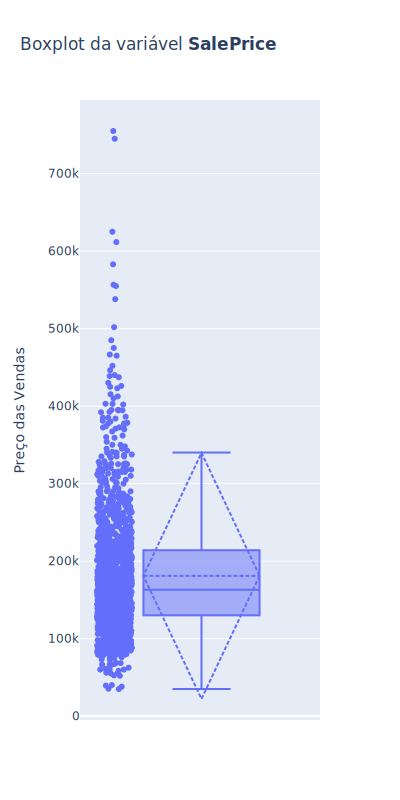

In [7]:
IQR = np.quantile(df['SalePrice'],0.75) - np.quantile(df['SalePrice'],0.25)

fig = go.Figure()

fig.add_trace(
            go.Box(
                y = [df['SalePrice']]
))


fig.update_traces(
                q1 = [np.quantile(df['SalePrice'],0.25)],
                median = [np.median(df['SalePrice'])],
                q3 = [np.quantile(df['SalePrice'],0.75)],
                lowerfence = [np.min(df['SalePrice'])],
                upperfence = [np.quantile(df['SalePrice'],0.75)+(1.5*IQR)],
                mean = [np.mean(df['SalePrice'])],
                sd = [2*np.std(df['SalePrice'])],
                overwrite=True
                )

fig.update_layout(
                title_text = 'Boxplot da variável <em>SalePrice</em>',
                height=800, width=400,
                xaxis = dict(
                            tickmode = 'array',
                            tickvals = [0],
                            ticktext = [' ']
                            )
)

fig.update_yaxes(title_text='Preço das Vendas')
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))


## Variáveis *OverallQual* e *GrLivArea*.

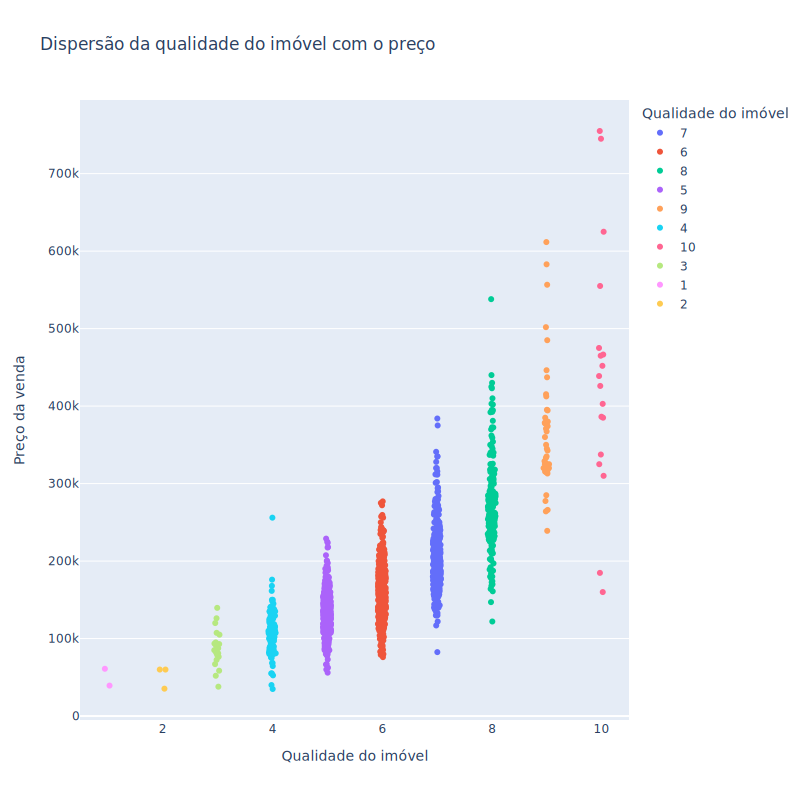

In [8]:
fig = px.strip(df, 
                x='OverallQual', y='SalePrice', 
                color = 'OverallQual', 
                title = 'Dispersão da qualidade do imóvel com o preço',labels= {'OverallQual': 'Qualidade do imóvel', 'SalePrice': 'Preço da venda'})
fig.update_layout(height=800, width=800)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))


&nbsp;&nbsp;&nbsp;&nbsp;É perceptível que existe uma boa distribuição dos dados neste gráfico, eles tem poucos dados em 1 e 2, todavia tem uma boa distribuição entre 3 e 8, se tornando mais dispersos entre 9 e 10 novamente. Essa dispersão lateral é um bom sinal, significa que os dados não estão totalmente dentro da média da variável e que se é possível generalizar a partir dessa variável.

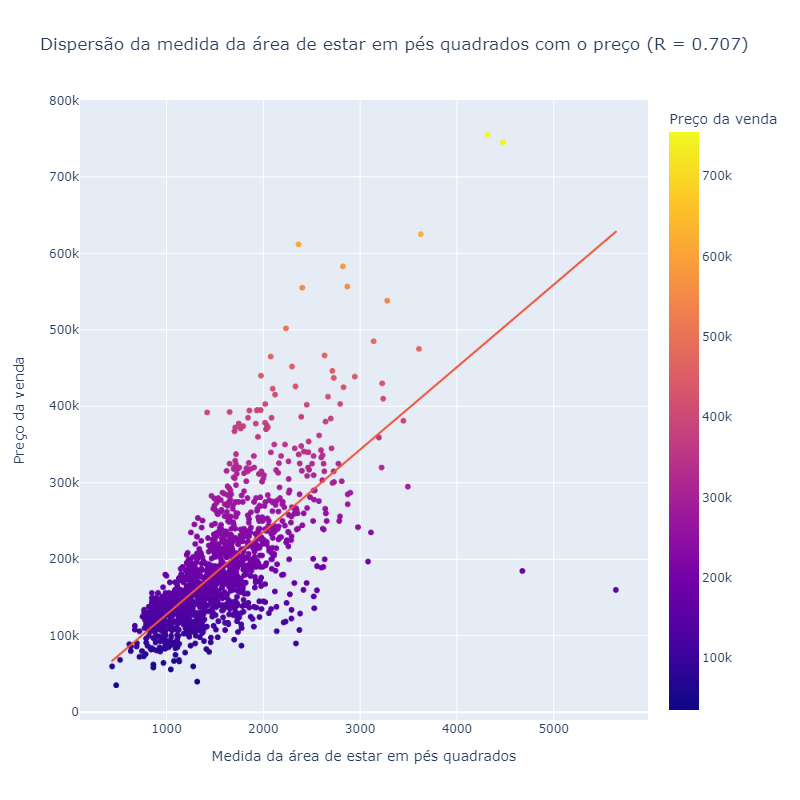

In [50]:
fig = px.scatter(df, x = 'GrLivArea', y = 'SalePrice', color = 'SalePrice',trendline='ols', title = 'Dispersão da medida da área de estar em pés quadrados com o preço (R = 0.707)', labels = {'GrLivArea': 'Medida da área de estar em pés quadrados', 'SalePrice': 'Preço da venda'})
fig.update_layout(height=800, width=800)
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)

&nbsp;&nbsp;&nbsp;&nbsp;Esse gráfico mostra uma ótima dispersão dos dados, eles começam bem compactos e depois começam a se dispersar mais, no mesmo caso do exemplo passado. Visualmente as duas variáveis se mostram bem correlacionadas a variável que será estudada.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Hipóteses

1. Existem muitos valores nulos, precisa-se verificar o motivo de serem nulos, provavelmente ou são dados faltantes ou são dados em que a resposta é negativa ou que não tem, por exemplo, não 
ter muro;

2. A dispersão dos dados precisa ser verificada, se em uma variável que se mostrou com alta correlação houve uma dispersão dos dados, provavelmente variáveis que são "lixo" são muito mais desbalanceadas;

3. Esse é um modelo de regressão, todavia um modelo de regressão a partir de árvore ou de regressão lasso, linear se tornaria melhor explicativo nessa hipótese


# Preparação dos dados

### Substituição das variáveis nulas (NaN)

### LotFrontage

&nbsp;&nbsp;&nbsp;&nbsp;*LotFrontage* significa a medida linear entre a frente do terreno e a rua. Esses valores podem variar de casa a casa, pois isso depende de a legislação local determinar essas medidas mínimas. A variável citada varia entre 21 pés e 313.


Imagem 1 - Limites de um terreno

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7ga06mZC6URQHnfFfjFdrgUc7CRUKSOekiw&usqp=CAU'>

Fonte: https://www1.nyc.gov/site/planning/zoning/glossary.page

&nbsp;&nbsp;&nbsp;&nbsp;É possível perceber que existe uma linha pontilhada entre os nos limites desse terreno, a distância entre a construção e a rua é o que é chamado *Street Frontage* e a distância de uma construção para o outro lote é chamado de *Lot Frontage*

&nbsp;&nbsp;&nbsp;&nbsp;Existem uma classificação de lote que se chama *Zero-Lot-Line* que são casas em que a distância entre a construção e outro lote não respeitam o mínimo indicado, isso acontece muitas vezes por conta de terrenos pequenos, que por terem uma área menor são mais baratos, e também causam bastante problemas de legislação, por conta de fundações invadindo terrenos alheios, muros, novas construções e dentre outros problemas que isso pode causar.

Imagem 2 - Casas *Zero-Lot-Line*

<img src = 'https://www.dfwurbanrealty.com/uploads/agent-1/garden-zero-lot-line-patio-homes-for-sale-dallas-tx.jpg'>

Fonte:https://www.dfwurbanrealty.com/dallas-patio-zero-lot-line-garden-homes.php

&nbsp;&nbsp;&nbsp;&nbsp;Levando em conta toda a explicação acima, é possível dizer que as casas que estão com 'NaN' podem ser chamadas como *Zero-Lot-Line*, que por terem uma distância entre lotes muito baixa ou nula, elas foram atribuídas na base de dados como 'NaN', logo o valor que será atribuído para montagem do problema é 0.

In [11]:
df['LotFrontage'].fillna(0, inplace=True)

### Alley

&nbsp;&nbsp;&nbsp;&nbsp;A variável *Alley* está com 1,369 instâncias nulas, todavia, no dicionário das variáveis é perceptível que a variável tem uma classificação 'NA' quando uma rua não tem saída do beco, todavia o lançamento desta variável dentro do dataset foi como NaN, então como início as variáveis NaN desta coluna serão substituídas por NA. 

In [12]:
df['Alley'].fillna('NA', inplace=True)

### MasVnrType/MasVnrArea

&nbsp;&nbsp;&nbsp;&nbsp;Essa variável explica o tipo de alvenaria que foi utilizado para a construção da edificação, e dentre eles estão o bloco comum, bloco com furos, bloco de concreto, pedras e nenhuma, todavia dentro dessa variável existem valores 'NaN' e também pode-se destacar uma predominância do valor '*None*', que se faz presente nos valores em que a alvenaria pode ser, por exemplo, de madeira, com isso os valores NaN serão substituídos por *None* e como consequência, a coluna *MasVnrArea* os NaN serão substituídos por 0. 

&nbsp;&nbsp;&nbsp;&nbsp;Vale destacar que isso se torna possível pois as duas colunas são correlacionadas e o índice dos valores 'NaN' são iguais nas duas colunas.

In [13]:
print(df.loc[pd.isna(df["MasVnrType"]), :].index)
print(df.loc[pd.isna(df["MasVnrArea"]), :].index)

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')
Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')


In [14]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

### BsmtQual/BsmtCond 

&nbsp;&nbsp;&nbsp;&nbsp;Essas variáveis significam a qualidade e a condição do porão, como é de se esperar, os nulos das duas colunas se encontram na mesma linha, seguindo a lógica do dicionário de dados NA significa que a casa não tem porão e após efetuar o comando *df.value_counts(['BsmtCond'])* é possível identificar que não existe uma classificação 'NA', logo o NaN significa o NA do dicionário de dados.  

In [15]:
var1 = np.array(df.loc[pd.isna(df["BsmtQual"]), :].index)
var2 = np.array(df.loc[pd.isna(df["BsmtCond"]), :].index)
dif_var = var1/var2
df_dif_var = pd.DataFrame(dif_var, columns=['df_dif_var'])
df_var1 = pd.DataFrame(var1, columns=['var1'])
anom = pd.concat([df_var1,df_dif_var], axis=1)
for i in range(len(df_dif_var)-1):
    if (df_dif_var.iloc[i,0] == df_dif_var.iloc[i+1,0]) == False:
        print('A anomalia está localizada no índice:',anom.loc[i+1,'var1'])
        break
    elif (i+2 == len(df_dif_var)) == True:
        print('Os nulos das colunas {} e {} estão na mesma posição'.format(df['BsmtQual'].name, df['BsmtCond'].name))

Os nulos das colunas BsmtQual e BsmtCond estão na mesma posição


In [16]:
df['BsmtQual'].fillna('NA', inplace=True)
df['BsmtCond'].fillna('NA', inplace=True)

### BsmtExposure

&nbsp;&nbsp;&nbsp;&nbsp;Após avaliar essa variável individualmente, é possível perceber que todos os valores em que esse valor aparece NaN é quando tanto o *BsmtQual* quanto o *BsmtCond* são iguais à NA. Porém existe um valor em que as duas variáveis citadas não são iguais à NA, que é na linha 948 o valor dessa variável é NaN, mas como é possível perceber nas variáveis *BsmtFinType1* e *BsmtFinType2* que são Unf (*Unfinished*) pode-se dizer que a casa tem um porão, todavia ainda não se iniciou a construção do mesmo. Tocante a isso, o porão não tem uma exposição direta a nenhum solo ou jardim, por não ter área construída, então o valor que será atribuída nos valores às variáveis NaN em que as colunas *BsmtQual* e *BsmtCond* são iguais à NA é NA, e o valor da linha 948 será de No (*No exposure*). É importante destacar que é possível a retirada da linha 948 do conjunto, caso a seleção de variáveis traga que a seguinte variável se torne importante.

In [17]:
x=df.loc[pd.isna(df["BsmtExposure"])]

In [18]:
df.value_counts(['BsmtExposure'])

BsmtExposure
No              953
Av              221
Gd              134
Mn              114
dtype: int64

In [19]:
df.loc[948, 'BsmtExposure'] = 'No'

In [20]:
df['BsmtExposure'].fillna('NA', inplace=True)

### BsmtFinType1/BsmtFinType2

1. BsmtFinType1

&nbsp;&nbsp;&nbsp;&nbsp;Essa variável apresenta os valores nulos quando tanto o *BsmtQual* quanto o *BsmtCond* são NA, logo o valor desta coluna também será NA.

2. BsmtFinType2

&nbsp;&nbsp;&nbsp;&nbsp;Essa variável apresenta os valores nulos quando tanto o *BsmtQual* quanto o *BsmtCond* são NA, logo o valor desta coluna também será NA. Todavia este valor apresenta um valor nulo a mais do que a variável acima, que está localizado na linha 332, esse valor representa um porão em que a sua primeira parte foi construída, mas a segunda ainda está em andamento, logo o valor desta variável nesta linha é NA. Vale destacar que a linha 332 pode ser removida por ser considerada como *outlier*.

In [21]:
x=np.array(df.loc[pd.isna(df["BsmtFinType1"]), :].index)
x1=np.array(df.loc[pd.isna(df["BsmtFinType2"]), :].index)

print(x)
print(x1)

for i in range(len(x1)):
    if x1[i] != x[i]:
        print('O índice que tem em BsmtFinType2 e não tem em BsmtFinType1 é:',x1[i])
        break

[  17   39   90  102  156  182  259  342  362  371  392  520  532  533
  553  646  705  736  749  778  868  894  897  984 1000 1011 1035 1045
 1048 1049 1090 1179 1216 1218 1232 1321 1412]
[  17   39   90  102  156  182  259  332  342  362  371  392  520  532
  533  553  646  705  736  749  778  868  894  897  984 1000 1011 1035
 1045 1048 1049 1090 1179 1216 1218 1232 1321 1412]
O índice que tem em BsmtFinType2 e não tem em BsmtFinType1 é: 332


In [22]:
df['BsmtFinType1'].fillna('NA', inplace=True)
df['BsmtFinType2'].fillna('NA', inplace=True)

### Electrical

&nbsp;&nbsp;&nbsp;&nbsp;A variável elétrica possui apenas um valor igual a NaN, analisando o dicionário de dados, é possível perceber que não existe valor representativo para dizer se a casa não tem uma instalação elétrica. Então para que não haja convergência para os dados, essa linha será retirada do *dataset*, uma vez que a variável não se apresenta no dicionário de dados.

In [23]:
df.dropna(subset=['Electrical'], inplace=True)

In [24]:
# É importante destacar que já que houve a eliminação da linha do nulo da variável Electrical, se faz necessário fazer um novo df.info() para verificar se outro também nulo foi eliminado
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### FireplaceQu

In [25]:
df.value_counts(['FireplaceQu'])    

FireplaceQu
Gd             380
TA             313
Fa              33
Ex              24
Po              20
dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;Como aconteceu parecido com as outras variáveis anteriores, essa variável as instâncias nulas correspondem a resposta 'NA' (*No Fireplace*).

In [26]:
df['FireplaceQu'].fillna('NA', inplace=True)

### GarageType/GarageFinish/GarageQual/GarageCond

&nbsp;&nbsp;&nbsp;&nbsp;A variável *GarageType* significa a localização da garagem que existe em uma residência, sendo que ela pode ser classificada em 6 variáveis sendo que 1 delas é a NA, que corresponde que não existe garagem, e como aconteceu em todas as instâncias anteriores, caso essa variável seja NaN, ela corresponde que a casa não tem garagem, sendo substituída por NA.

In [27]:
def ver_col():
    dict = {'GarageType': np.array(df.loc[pd.isna(df["GarageType"]), :].index), 'GarageFinish': np.array(df.loc[pd.isna(df["GarageFinish"]), :].index), 'GarageQual': np.array(df.loc[pd.isna(df["GarageQual"]), :].index), 'GarageCond': np.array(df.loc[pd.isna(df["GarageCond"]), :].index)}
    for i in range(0,len(dict)-1):
        dif_var = list(dict.values())[i+1]/list(dict.values())[i]
        for j in range(len(dif_var)-1):     
            if (dif_var[j] == dif_var[j+1]) == False:
                print('A diferença está localizada no índice:',anom.loc[j+1,'var1'])
                break
            elif (j+2 == len(dif_var)) == True:
                print('Os nulos das colunas {} e {} estão na mesma posição'.format(df[list(dict)[i]].name, df[list(dict)[i+1]].name))
ver_col()

Os nulos das colunas GarageType e GarageFinish estão na mesma posição
Os nulos das colunas GarageFinish e GarageQual estão na mesma posição
Os nulos das colunas GarageQual e GarageCond estão na mesma posição


In [28]:
df['GarageType'].fillna('NA', inplace=True)
df['GarageFinish'].fillna('NA', inplace=True)
df['GarageQual'].fillna('NA', inplace=True)
df['GarageCond'].fillna('NA', inplace=True)

### PoolQC/PoolArea/Fence/Id

&nbsp;&nbsp;&nbsp;&nbsp;Essas duas variáveis estão muito pobres de informações, serão removidas logo de início.

In [29]:
df.drop(['PoolArea','PoolQC','Fence','Id'], axis = 1, inplace = True)

### MiscFeature/MiscVal

&nbsp;&nbsp;&nbsp;&nbsp;Essas duas variáveis mostram condições extremas de casas, como elevador privativo, decks, segunda garagem e dentre outros. Fornecendo poucas informações sobre casas com características dessa coluna, elas serão removidas logo de início. Vale destacar que houve a sobreposição dos nulos apenas para montagem do gráfico e o valor da coluna MiscVal, caso MiscFeature seja NA, é igual a 0.

In [30]:
df['MiscFeature'].fillna('NA', inplace=True)

In [31]:
df.value_counts(['MiscFeature'])

MiscFeature
NA             1405
Shed             49
Gar2              2
Othr              2
TenC              1
dtype: int64

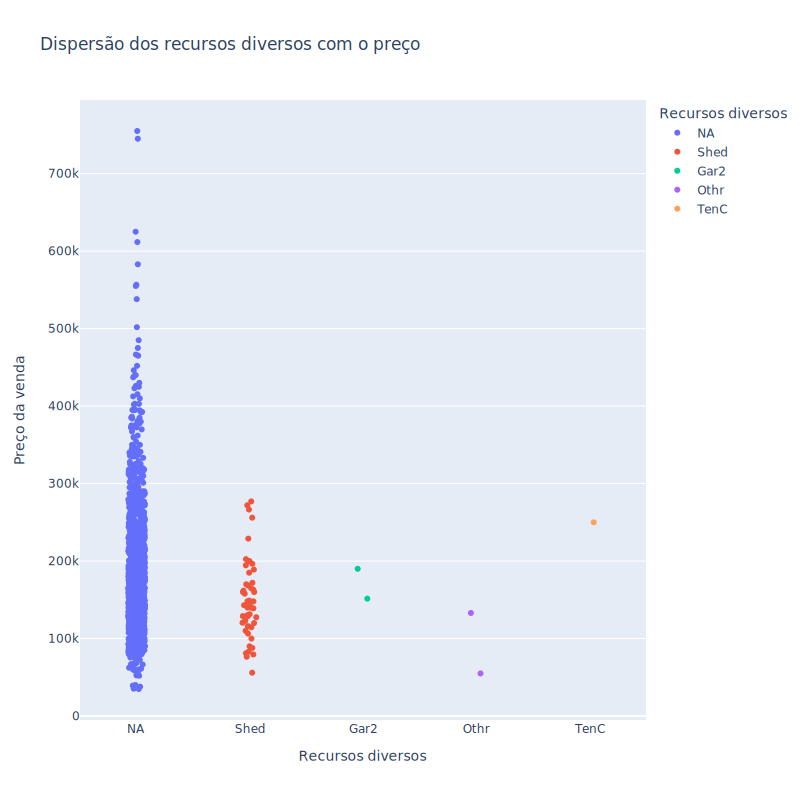

In [32]:
fig = px.strip(df, 
                x='MiscFeature', y='SalePrice', 
                color = 'MiscFeature', title = 'Dispersão dos recursos diversos com o preço',
                labels= {'MiscFeature': 'Recursos diversos', 'SalePrice': 'Preço da venda'})
fig.update_layout(height=800, width=800)
img_bytes = pio.to_image(fig, format="svg")
display(SVG(img_bytes))

&nbsp;&nbsp;&nbsp;&nbsp;Após a análise do gráfico é possível perceber que existe um acumulo muito grande de instâncias dentro da coluna NA, por isso esta coluna será removida para não influenciar a seleção de variáveis.

In [33]:
df.drop(['MiscFeature','MiscVal'], axis = 1, inplace =True)

### GarageYrBlt

&nbsp;&nbsp;&nbsp;&nbsp;Essa variável funciona de maneira diferente da anterior, mesmo aparencendo em todas as linhas em que as 4 variáveis acima são nulas, essa variável não é categórica e representa o ano de construção da garagem, todavia não tem como classificar essa coluna como '0' ou como um tipo de classificador, por afetar diretamente o resultado das medidas estatísticas e não fazer sentindo um ano igual a 0. Essa variável parece ser importante para o modelo, uma vez que o ano de construção da garagem se mostra interessante para a compra de uma casa, as variáveis ao invés de serem substituídas serão excluídas. 

In [34]:
#já que só sobrou esta coluna com valores nulos, um 'dropna' é suficiente 
df.dropna(inplace = True)

## Remoção massiva de colunas

&nbsp;&nbsp;&nbsp;&nbsp;De acordo com o apresentado anteriormente, é claro que existe colunas que não trazem informações suficientes para a solução do problema, portanto, a ideia inicial será remover todas as colunas em que o maior valor presente nela seja 80%, uma vez que a coluna irá apresentar muitos dados para uma instância e poucos para outro, causando uma maior poluição para dentro do conjunto de dados. 

In [35]:
#remoção de colunas com sobrecarregamento de dados de uma categoria
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]) == True:
        x = df.value_counts([col], normalize=True)
        if x.iloc[0] > 0.80:
            df.drop([col], axis = 1, inplace = True)

&nbsp;&nbsp;&nbsp;&nbsp;Para verificar o comportamento dos gráficos, será efetuado gráficos rápidos para as variáveis em que o maior valor normalizado está entre 80 e 30 porcento para analisar o comportamento desses dados visualmente.

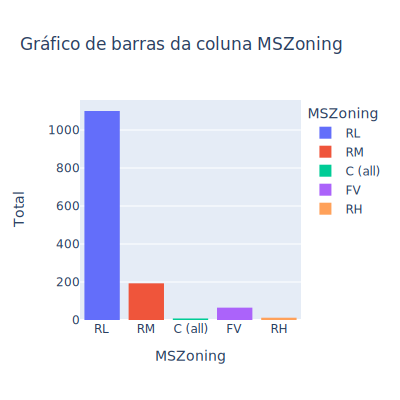

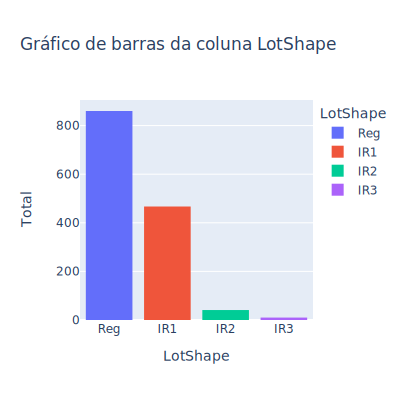

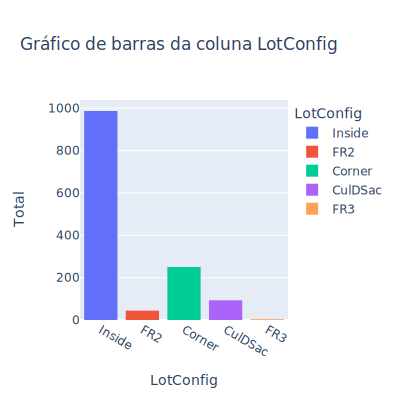

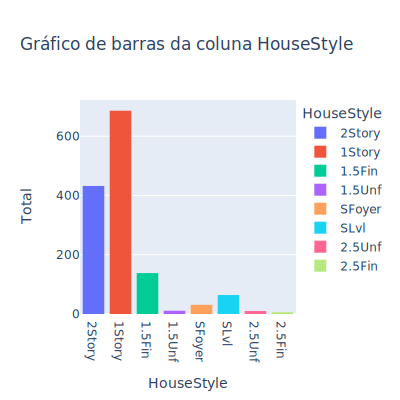

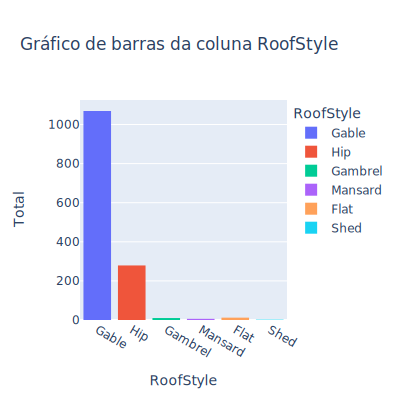

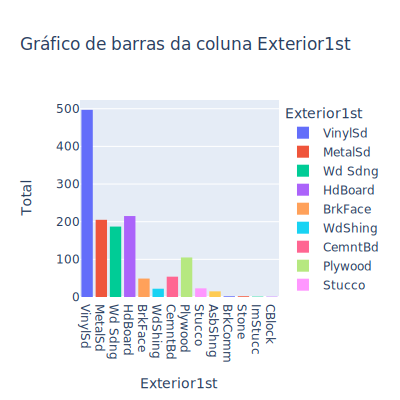

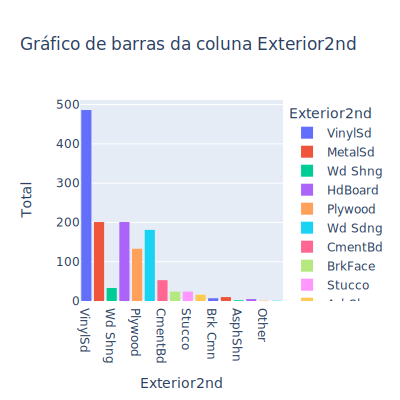

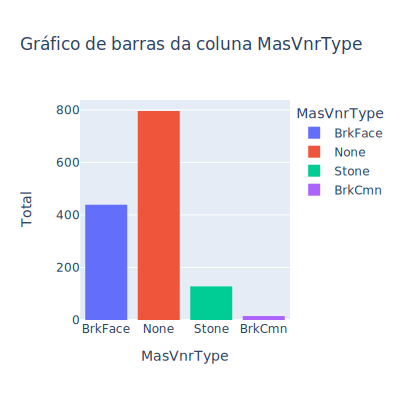

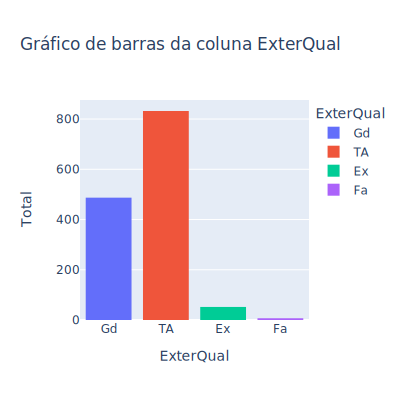

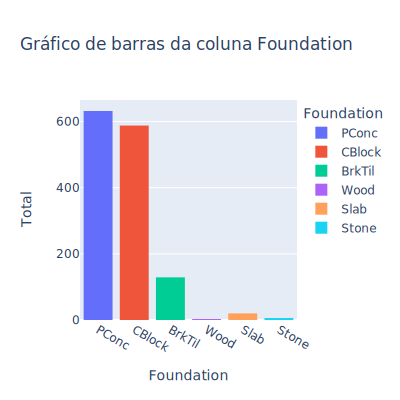

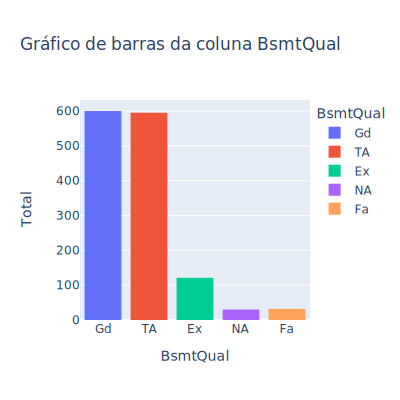

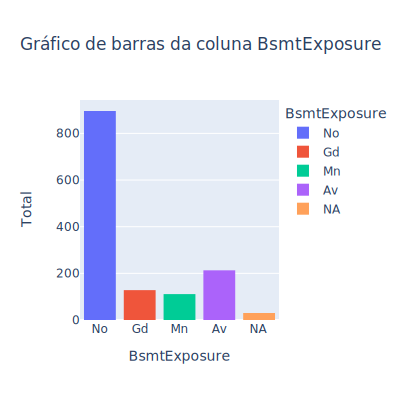

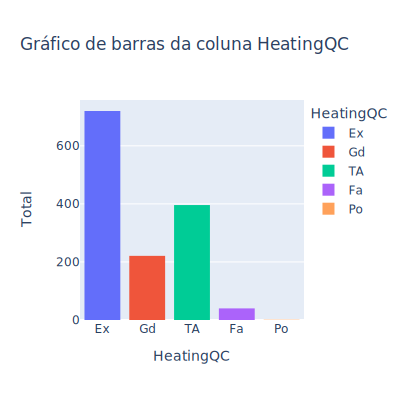

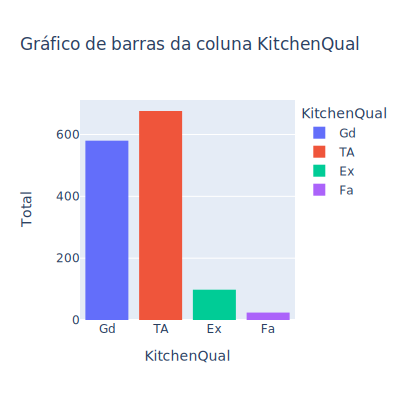

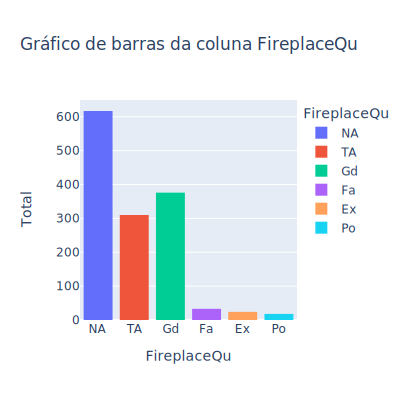

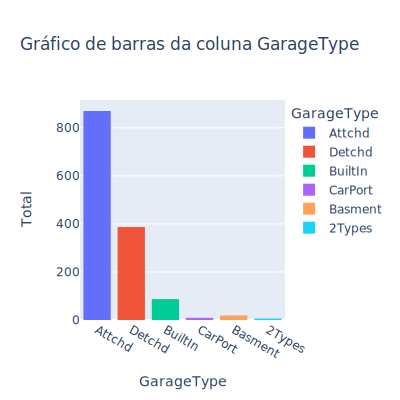

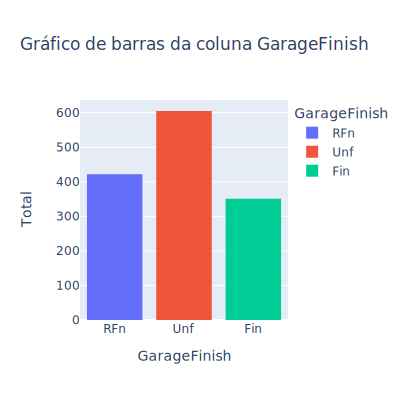

In [36]:
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]) == True:
        x = df.value_counts([col], normalize=True)
        if x.iloc[0] > 0.30:
            fig = px.histogram(df, x=col, color= col, title = 'Gráfico de barras da coluna {}'.format(col))
            fig.update_layout(height=400, width=400,yaxis_title = 'Total')
            img_bytes = pio.to_image(fig, format="svg")
            display(SVG(img_bytes))

&nbsp;&nbsp;&nbsp;&nbsp;Claramente existe um problema grande relacionado a variáveis que aparecem pouco e variáveis que aparecem demais, trazendo um desequilíbrio enorme para o conjunto de dados e para solucionar este problema será efetuado uma técnica de remoção de *outliers* utilizando a biblioteca pyod.

## Implementação dos modelos

### Remoção de *outliers*/formatação dos dados

In [37]:
#cópia do dataframe original para que os dados principais não sejam alterados
df1 = df.copy()

#troca das variáveis categóricas nominais por categoricas numericas
for col in df1.columns:
    if pd.api.types.is_string_dtype(df1[col]) == True:
        unq = np.sort(df1[col].unique())
        for i in range(len(unq)):
            df1[col] = df1[col].replace(unq[i], i+1)
    if col == 'MSSubClass':
        exc = np.sort(df1['MSSubClass'].unique())
        for j in range(len(exc)):
            df1['MSSubClass'] = df1['MSSubClass'].replace(exc[j], i+1)

X = df1.drop(['SalePrice'], axis = 1)
y = df1['SalePrice']

In [38]:
#algoritmo de remoção de outlier - knn

X_std = MinMaxScaler().fit_transform(X)
detector = KNN(contamination= 0.09, method='median') #contamination significa o percentual de outliers que será detectado e o método utilizado será o de mediana, que foi o que obteve as melhores métricas
detector.fit(X,y)

c:\Users\augus\anaconda3\lib\site-packages\pyod\models\base.py:412: UserWarning:

y should not be presented in unsupervised learning.



KNN(algorithm='auto', contamination=0.09, leaf_size=30, method='median',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [39]:
#array do tamanho dos outliers em que: 0 - não é outlier, 1 - é outlier
previsoes = detector.labels_
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([1254,  124], dtype=int64))

In [40]:
#lista com outliers e remoção do dataframe
outliers = []
for i in range(len(previsoes)):
    if previsoes[i]==1:
        outliers.append(i)
df1.drop(df1.index[outliers], inplace = True)

In [41]:
#recriação das variaveis, pois o dataframe foi alterado
X = df1.drop(['SalePrice'], axis = 1)
y = df1['SalePrice']

### Seletor das variáveis

In [42]:
rfe = RFE(estimator =  DecisionTreeRegressor(random_state=30), n_features_to_select=27).fit(X,y)
rfe.fit(X,y)

X = df1[rfe.get_feature_names_out()]
y = df1['SalePrice']

In [43]:
rfe.get_feature_names_out()

array(['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MoSold',
       'YrSold'], dtype=object)

### Modelos

In [44]:
model = 'Random Forest'

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.2)

regression = RandomForestRegressor(n_estimators = 300, random_state=10, max_features= 'log2',max_leaf_nodes = 300)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(f'A métrica R² Score do modelo {model} é: {round(r2_score(y_test, y_pred),3)}')
print(f'A métrica do Erro médio quadrado (MAE) do modelo {model} é: {round(mean_squared_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio (RMSE) do modelo {model} é: {round(mean_absolute_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio em porcentagem (MAPE) do modelo {model} é: {round(mean_absolute_percentage_error(y_test, y_pred),3)}')

A métrica R² Score do modelo Random Forest é: 0.919
A métrica do Erro médio quadrado (MAE) do modelo Random Forest é: 357754257.624
A métrica do erro absoluto médio (RMSE) do modelo Random Forest é: 13246.525
A métrica do erro absoluto médio em porcentagem (MAPE) do modelo Random Forest é: 0.085


In [45]:
model = 'LightGBM'

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.2)

regression = lgb.LGBMRegressor(boosting_type='gbdt',learning_rate = 0.1, num_iterations = 100,random_state=10, num_leaves =300)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(f'A métrica R² Score do modelo {model} é: {round(r2_score(y_test, y_pred),3)}')
print(f'A métrica do Erro médio quadrado (MAE) do modelo {model} é: {round(mean_squared_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio (RMSE) do modelo {model} é: {round(mean_absolute_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio em porcentagem (MAPE) do modelo {model} é: {round(mean_absolute_percentage_error(y_test, y_pred),3)}')

A métrica R² Score do modelo LightGBM é: 0.918
A métrica do Erro médio quadrado (MAE) do modelo LightGBM é: 359364528.098
A métrica do erro absoluto médio (RMSE) do modelo LightGBM é: 13974.536
A métrica do erro absoluto médio em porcentagem (MAPE) do modelo LightGBM é: 0.087


c:\Users\augus\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



In [46]:
model = 'Ada Boost'
X_std = StandardScaler().fit(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.2)

regression = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30), learning_rate=0.1,n_estimators=200 ,random_state=10)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(f'A métrica R² Score do modelo {model} é: {round(r2_score(y_test, y_pred),3)}')
print(f'A métrica do Erro médio quadrado (MAE) do modelo {model} é: {round(mean_squared_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio (RMSE) do modelo {model} é: {round(mean_absolute_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio em porcentagem (MAPE) do modelo {model} é: {round(mean_absolute_percentage_error(y_test, y_pred),3)}')

A métrica R² Score do modelo Ada Boost é: 0.908
A métrica do Erro médio quadrado (MAE) do modelo Ada Boost é: 401934348.586
A métrica do erro absoluto médio (RMSE) do modelo Ada Boost é: 13937.271
A métrica do erro absoluto médio em porcentagem (MAPE) do modelo Ada Boost é: 0.085


In [47]:
model = 'Lasso Regression'
X_std = StandardScaler().fit(X,y)

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.2)

regression = Lasso(alpha = 0.5, max_iter=1000, random_state=10)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(f'A métrica R² Score do modelo {model} é: {round(r2_score(y_test, y_pred),3)}')
print(f'A métrica do Erro médio quadrado (MAE) do modelo {model} é: {round(mean_squared_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio (RMSE) do modelo {model} é: {round(mean_absolute_error(y_test, y_pred),3)}')
print(f'A métrica do erro absoluto médio em porcentagem (MAPE) do modelo {model} é: {round(mean_absolute_percentage_error(y_test, y_pred),3)}')

A métrica R² Score do modelo Lasso Regression é: 0.907
A métrica do Erro médio quadrado (MAE) do modelo Lasso Regression é: 408402642.62
A métrica do erro absoluto médio (RMSE) do modelo Lasso Regression é: 15446.693
A métrica do erro absoluto médio em porcentagem (MAPE) do modelo Lasso Regression é: 0.098


c:\Users\augus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+11, tolerance: 4.387e+08



### Decisão do modelo

**RESULTADOS**

|Modelo| R²| MAE | RMSE| MAPE|
|:----|:---:|:---:|:---:|:---:|
|Random Forest| 0.918 | 13252.894 | 357936160.559| 0.085|
|LightGBM| 0.918 | 13974.536| 359364528.098|0.087|
|AdaBoost| 0.908 | 13937.271 | 401934348.586|0.085|
|Regressão Lasso| 0.907|15446.693 | 408402642.62 |0.098|


&nbsp;&nbsp;&nbsp;&nbsp;O modelo que obteve melhor rendimento (melhores resultados do R², MAE e RMSE) e o escolhido foi o Random Forest, porém os outros modelos se mostraram sólidos em relação aos seus resultados, com destaque ao LightGBM, que obteve resultados próximos, o lightGBM é um modelo que busca custo computacional a custa de perda de qualidade de resultado, ou seja é um ótimo modelo, caso o custo computacional seja um problema

## Relatório

&nbsp;&nbsp;&nbsp;&nbsp;Segundo os dados fornecidos à equipe de dados, o conjunto de dados entregue se encontrava com vários valores nulos que identificamos que na verdade eram valores negativos (não tem garagem, não tem fogueira, não tem saída para o beco e dentre outras), e também tivemos dificuldade em identificar uma variável que se tornou importante para o modelo, que é a variável 'GarageYrBlt' (Ano de construção da garagem), essa coluna apresentou inúmeros nulos que são justificáveis, pois as cinco colunas GarageType/GarageFinish/GarageQual/GarageCond/GarageYrBlt estão com nulos nas mesmas linhas, caracterizando a falta de uma garagem, porém as 4 variáveis citadas são variáveis categóricas que podem ser substituídas por uma variável que nos foi fornecida através do dicionário de dados que é a variável 'NA' que significa a ausência de uma garagem. Porém é complicado substituir um ano por NA, 0 ou a média, moda ou mediana pois a equipe estaria 'imaginando' uma garagem fictícia, que como foi testado dentro dos modelos, causou queda de rendimento.

&nbsp;&nbsp;&nbsp;&nbsp;Foram testados 4 modelos para a resolução do problema e o modelo que se mostrou com melhor rendimento obteve acertos acerca de 92.4%, com variação percentual de 8.4%, sendo que as variáveis que se tornaram mais importantes para o modelo foram:

| | | | | | |
|-------|-------|-------|-------|-------|-------|
|MSZoning|LotFrontage|LotArea|Neighborhood|OverallQual|OverallCond|
|YearBuilt|YearRemodAdd|ExterQual|BsmtQual|BsmtFinSF1|BsmtUnfSF|
|TotalBsmtSF|1stFlrSF|2ndFlrSF|GrLivArea|BedroomAbvGr|TotRmsAbvGrd|
|GarageType|GarageYrBlt|GarageFinish|GarageArea|WoodDeckSF|OpenPorchSF|
|ScreenPorch|MoSold|YrSold| | | |

&nbsp;&nbsp;&nbsp;&nbsp;Vale destacar que os dados fornecidos foram insuficientes para atingir métricas superiores, caso seja possível, que seja pensado em alguma possibilidade de aumentar o conjunto de dados.
